# 2025-05-26

Stat Inferencing

Why do we need sample:

Understand the observed data from a subset of the data

Computing the population directly can be impractical and time consuming and costly;

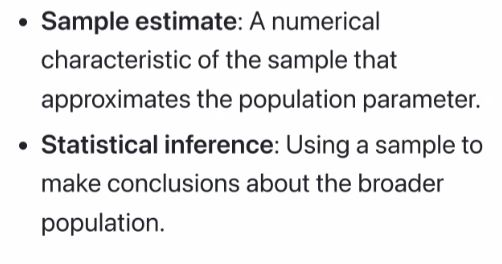



Q & A

Q: Am I just overthinking, or sample can be biased(from time to time/randomly)?

A: Yes there are many types of biases that can be induced while sampling. A sample is usually going to be much smaller then true population, hence it will tend to miss alot aspects in the full true pop

Q: How do we select the size of the sample?

A: That is also a very big concept regarding and depends on a few key factors. Such as how accurate do we want to measure the quantity of interest, also depends on different types of biases included in our sampling procedure

Q; No need to address in class because this is probably outside of scope but, would we get a normal distribution from repeated sampling even if the underlying distribution isn’t normal? E.g. the population variable follows gamma distribution?

A: The sample of means will be normally distributed (in the limit ie as the sample size increases)


A: The original population doesnt need to be distributed normally

A: This property is for taking samples of averages which tend towards normal distribution as the sample size increases. (Under certain conditions)

A: Bootstrapping is going to be only as representative of the original true population as the sample is representative of the original pop


Q: Is it possible that the initial sample is small enough that even if we do bootstrapping, it will bring us nowhere close to the real population metrics? 

A: Yep you are correct!

A: No, bootstrap samples that are only 80% the size of the original dataset will generally produce wider and less reliable confidence intervals than samples that are 100% in size, even if you take the same number of bootstrap samples (e.g., 10,000).  Taking smaller bootstrap samples has a big effect on the analysis. And needs to  be adjusted later on in the computation but needs to be taken care of carefully in the analysis.

Q: How is confidence interval used in practice?

A: example: when election polls come out, they always say something like “+ or -2.5%” → that’s a 95% confidence interval. if a new drug reduces blood pressure by 8 mmHg (CI: [5, 11]), they’re saying “we’re pretty confident it helps, and this is the likely effect range.” Is give people a sense of how much trust to put in a number. not just “what did we get?” but “how sure are we about it?”   The confidence interval doesn't just give you a single "best guess”, it gives you a range of how big that difference could plausibly be in the real world, accounting for the randomness of your sample. 

Q:  can you only use bootstrapping for calculating a numerical value?

A: Bootstrapping can be used with categorical data too. Just the analysis is quite different and the types of questions we answer with numerical data don’t really apply to to categorical analysis. Bootstrapping can be used for any statistic where you want to understand its variability,  or uncertainty.. so it can be a number, but it can also be more complex structure like a model (i.e., stability of clustering is what i use it for). With bootstrapping if you’re aware the sampling bias present in the sample then you can potentially account for it in your bootstrap analysis

Q: how do we select the value of n? Here as 40?

A: We are assuming that is the sample number of datapoint we have access to. And for bootstraps we just keep it the same as the sample size. 20k is arbitrary large number. 40 is the number we pretend we have access to (for our first sample)

Q:  is there a way to calculate ideal bootstrapping number?

A: There is no fixed ideal value. 

10,000 bootstrap samples is a common default in practice.


Q: Does the bootstrap make inference on the sample mean or on the population mean? My sample mean is $219, my bootstrap mean is also around $219. However, the population mean we calculated earlier is $249. A $30 off seems pretty large.

A: The bootstrap makes inference on the sample mean, not the population mean.

Sampling Example:

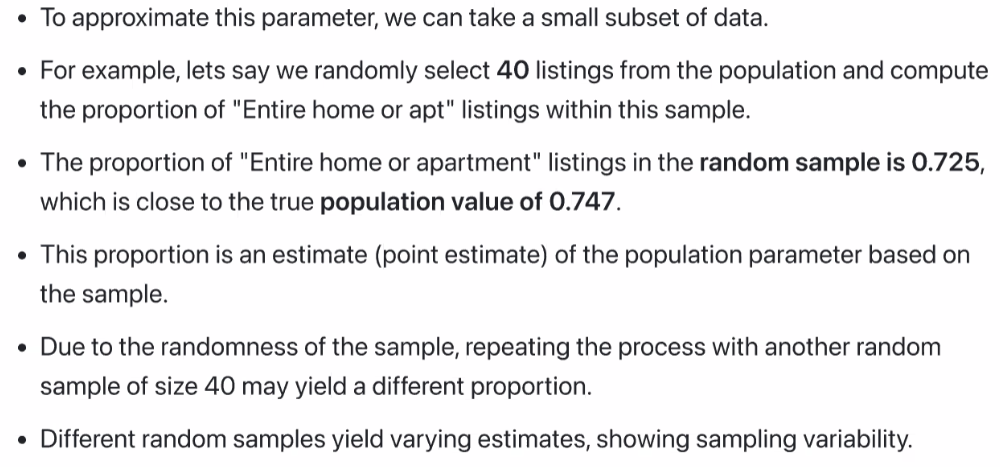

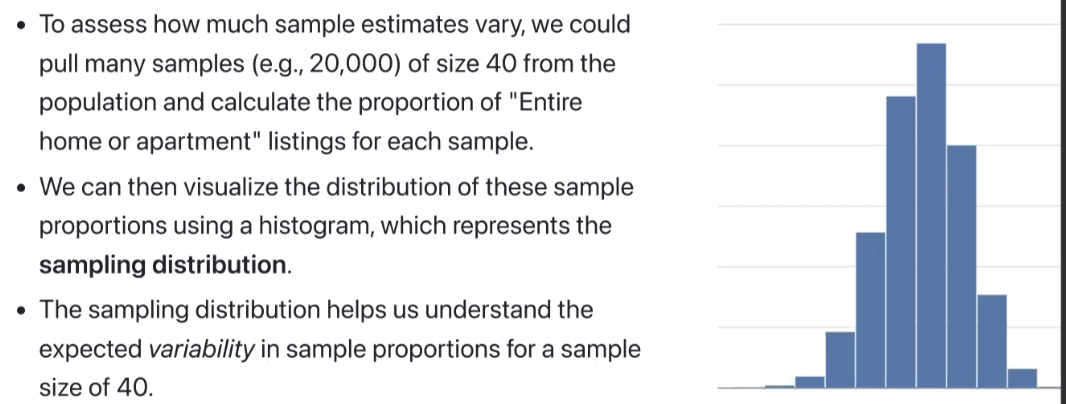

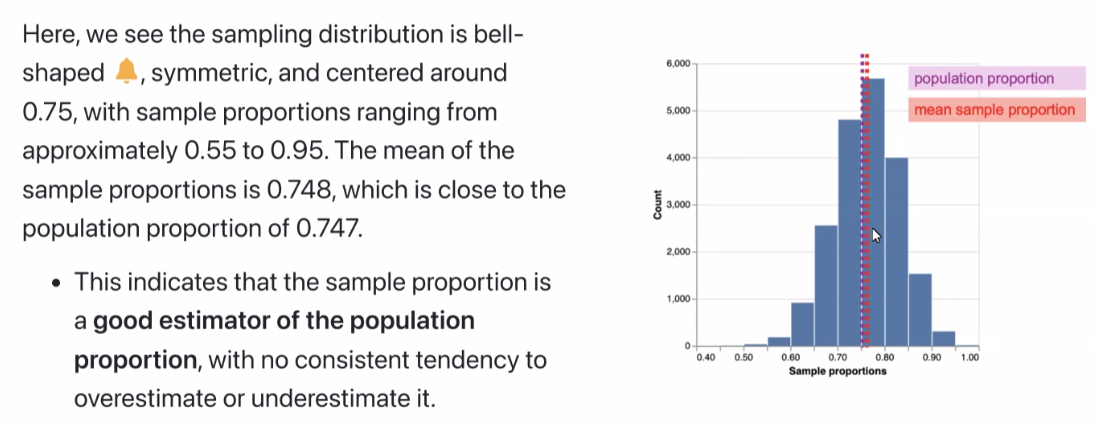

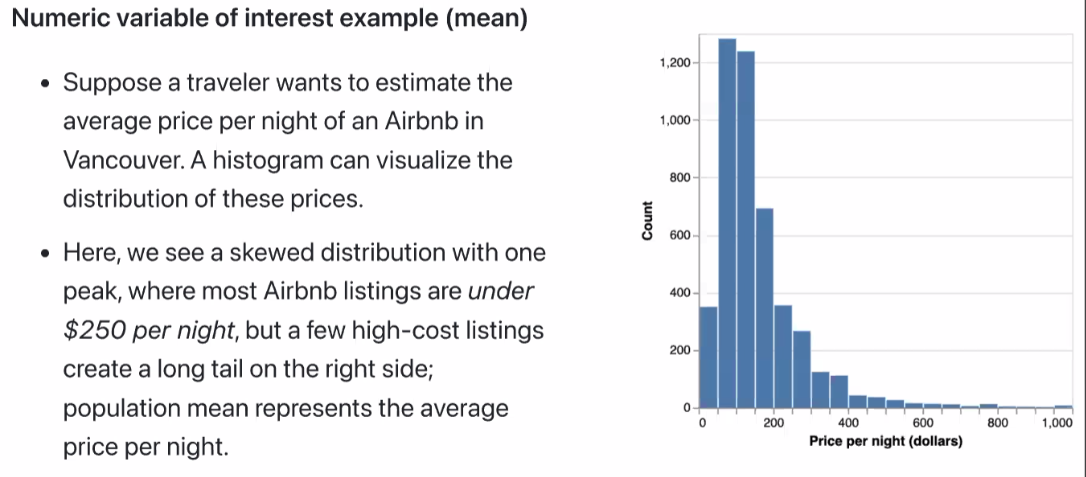

The sample of the data

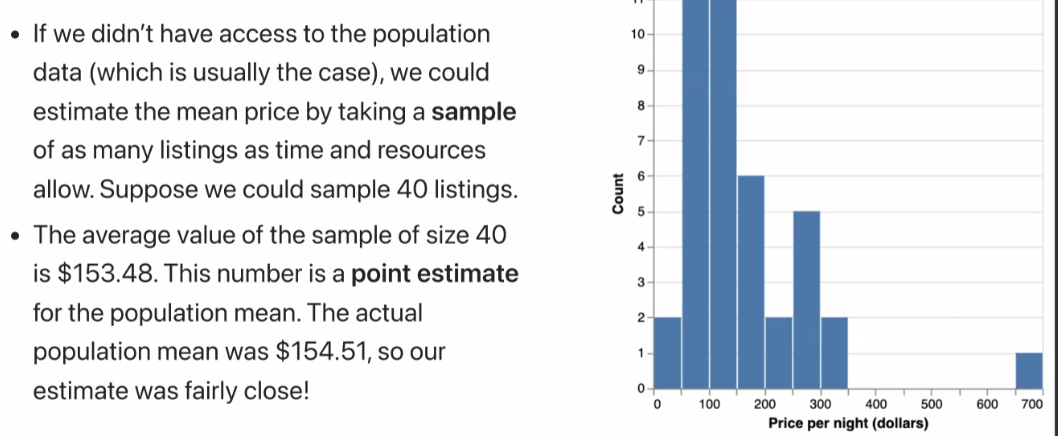

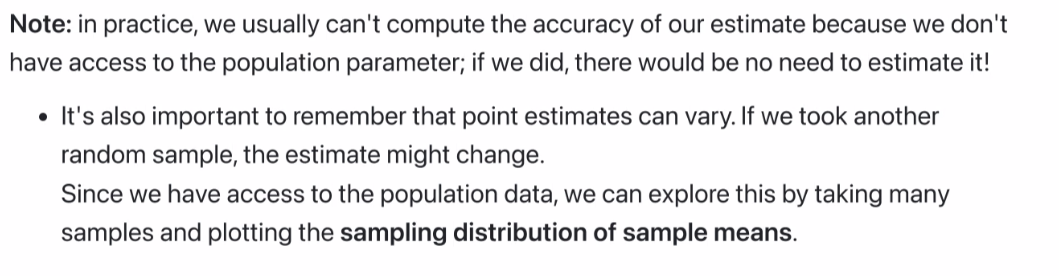

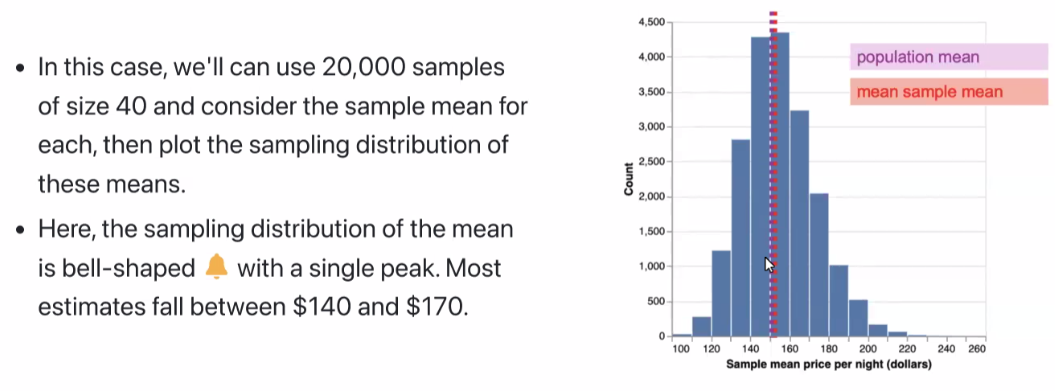

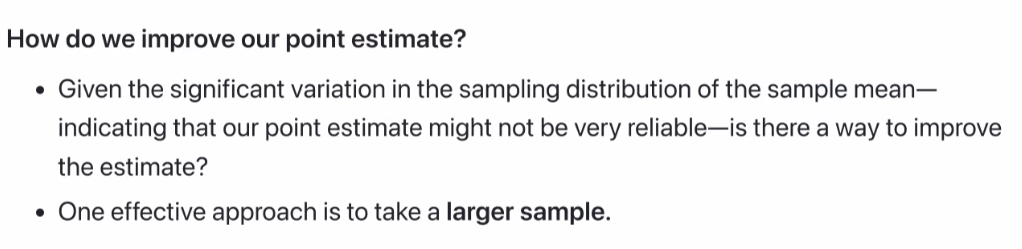

(The larger sample will likely show the spread of the population data)

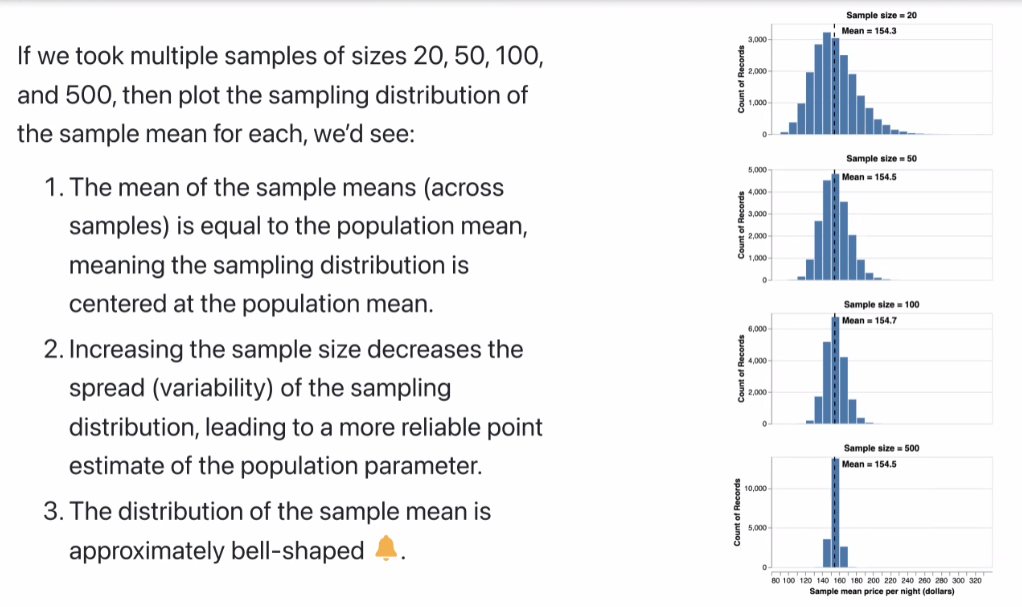

Central limit theorem:

The majoritity of the data will take the shape of a bell curve




Key Points:

(Should resemble the population distribution)

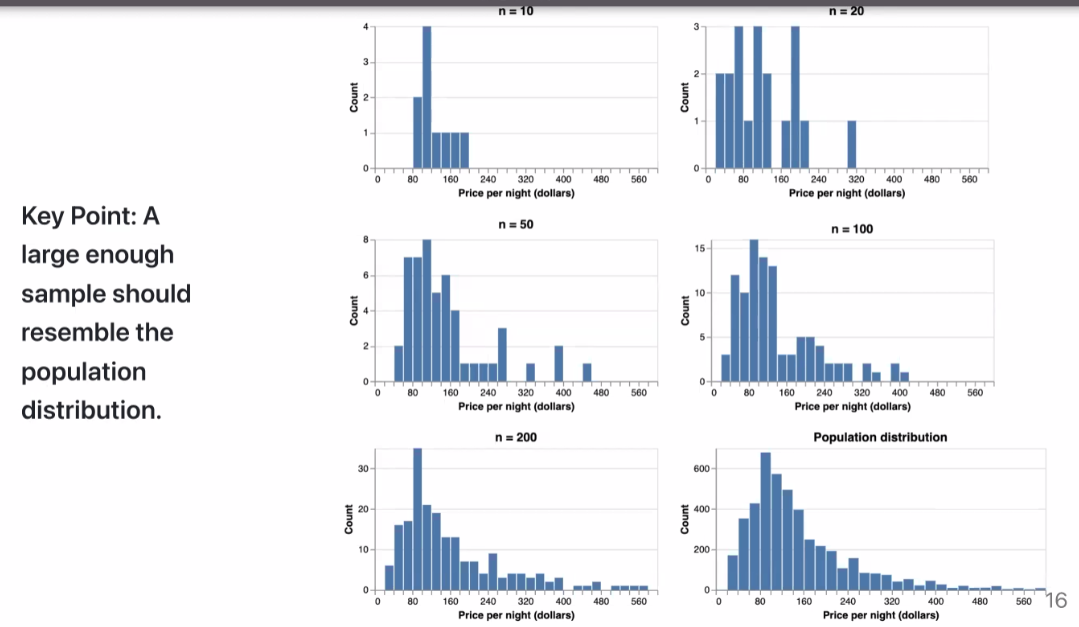

Sample distribution <> is not the same as the population distribution; But as sample size increases, it should be more closer to it;



Summary:

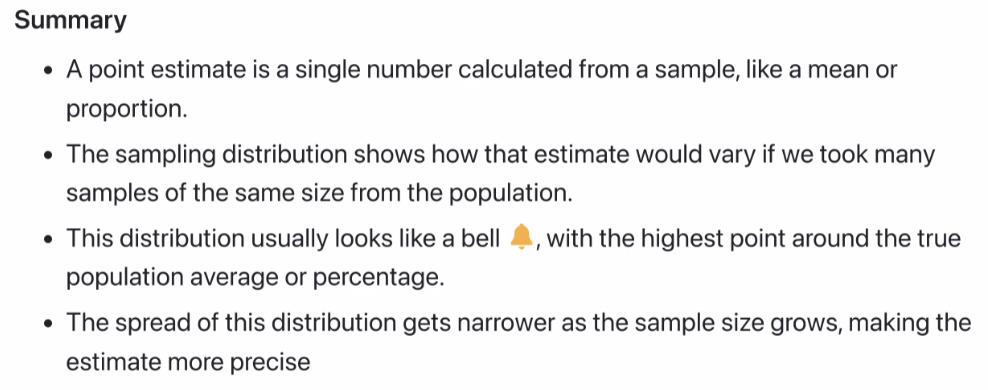



Bootstrapping

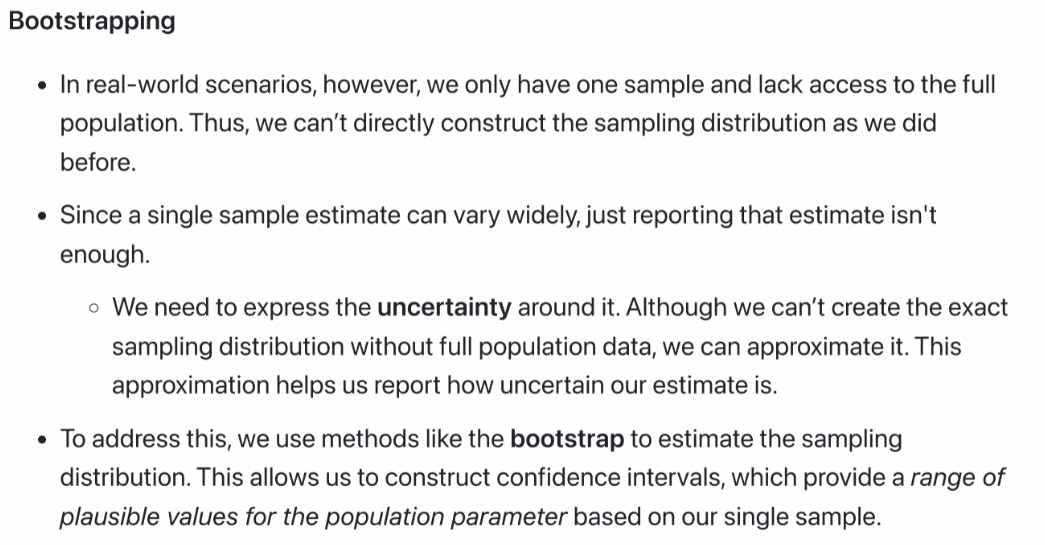


Ex:

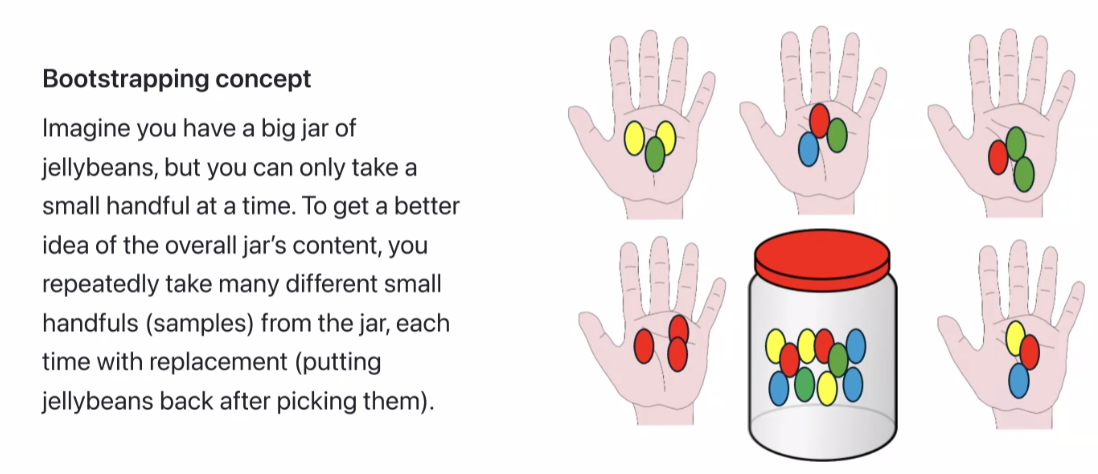

sampling with replacement > take many resampling of the data and it allows us to estimate the data

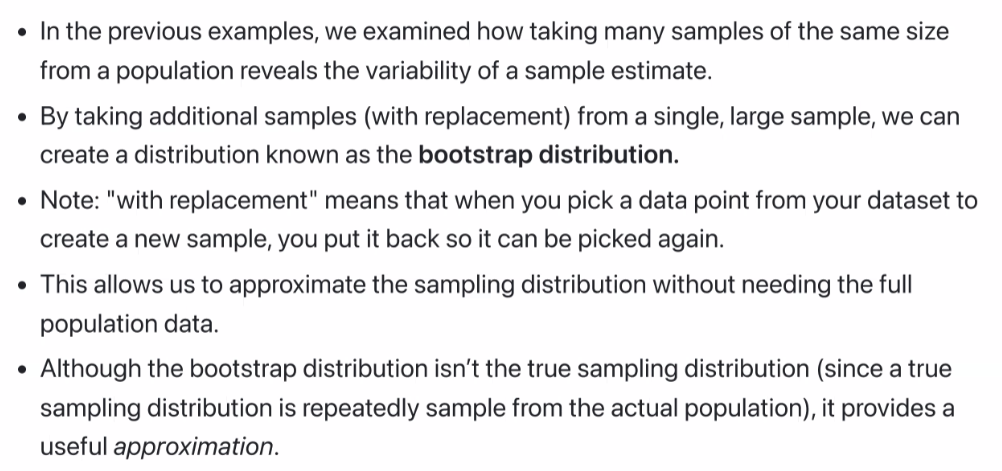

The same data point can be chosen again; from every sample we are calculating n number of calculations;

EX: randomly select a value from the sample; then put it back, until we get a bootstrap sample the same size of the original sample;


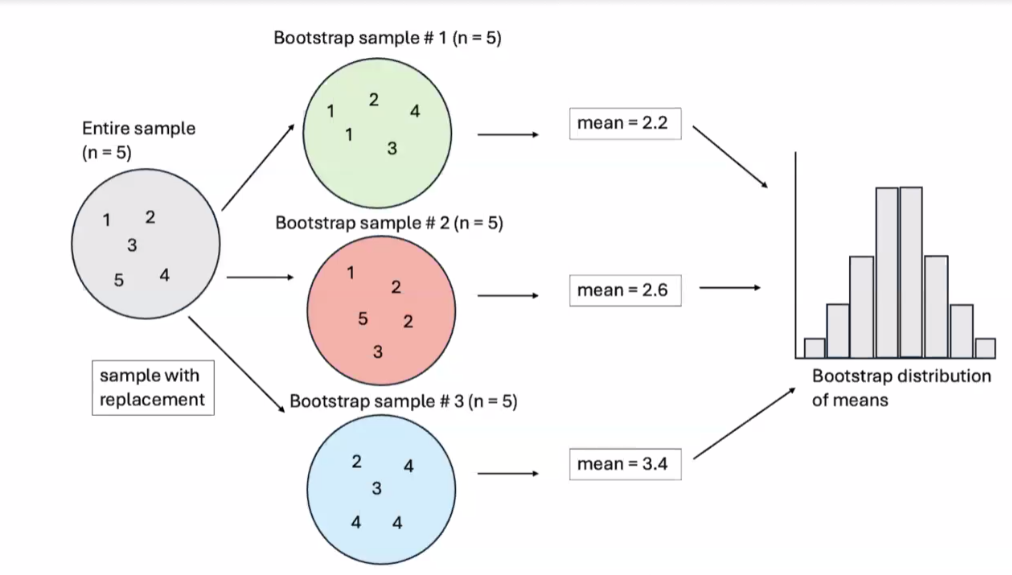

Stand in for the population;



Calculations for plausible range: 

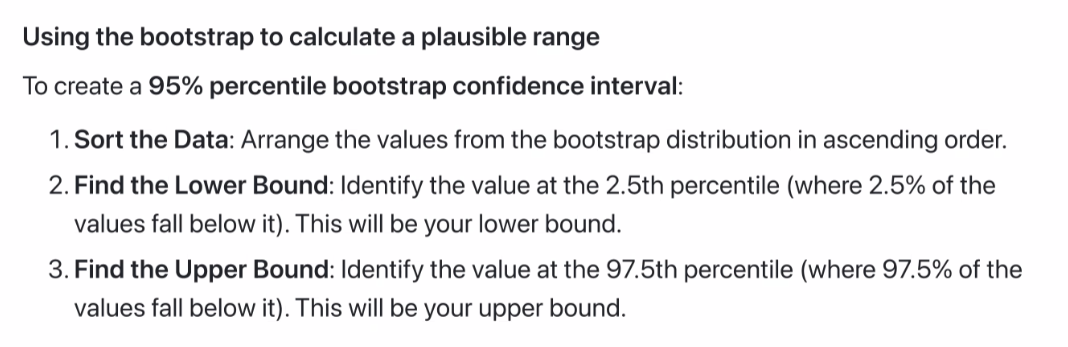

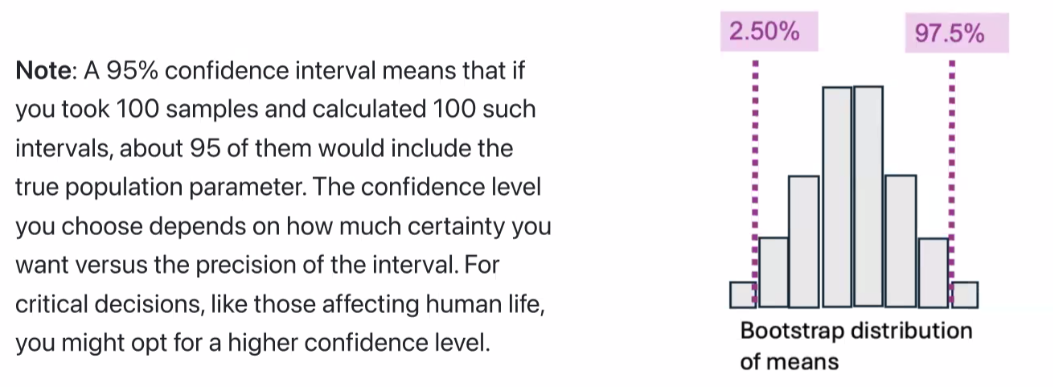


A 95% CI means that we are 95% certain based on the bootstrap data (the mean or diff calc), the population will be the same?

>>> if we had multiple bootsamples; 95% CI of the time the true mean should ;

Can't use bootstrap to find pop mean; trying to approx the pop.


------------------------------------------------------------

# Live Coding

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [11]:


# Load the Airbnb listings dataset from a CSV file
airbnb = pd.read_csv(r"C:\Users\User\Github\LCR\01_materials\notebooks\dataset\listings.csv")



In [12]:


# Calculate and return the average price from the "price" column in the Airbnb dataset
airbnb["price"].mean()



249.16526273565984

In [15]:


# Set the random seed to 100 for reproducibility
np.random.seed(100)

# Randomly select a sample of 40 rows from the Airbnb dataset and calculate the average price from the "price" column
airbnb.sample(n=40)["price"].mean()



222.875

In [ ]:


# Set the random seed to 100 for reproducibility
#np2.random.seed(100) # if commented out

# Randomly select a sample of 40 rows from the Airbnb dataset and calculate the average price from the "price" column
airbnb.sample(n=40)["price"].mean()



315.25

In [ ]:
sample_list = []

# _ is readiblity for ,; with lots of zeroes

# 20k is arbitrary large number
for i in range(20_000):
    # 40 is the number we pretend we have access to (for our first sample)
    sample = airbnb.sample(n = 40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)
samples = pd.concat(sample_list)

# 20K sample of 40 each


In [ ]:
samples 
# replicate column tells us which sample it is from


id        neighbourhood        room_type  accommodates  \
3211  6.750000e+17           Riley Park     Private room             2   
4154  8.750000e+17  Victoria-Fraserview     Private room             1   
3690  7.790000e+17             Downtown  Entire home/apt             2   
4769  9.640000e+17            Kitsilano  Entire home/apt             2   
1973  4.151029e+07    Dunbar Southlands     Private room             1   
...            ...                  ...              ...           ...   
1695  3.611232e+07            Killarney     Private room             1   
4817  9.700000e+17    Downtown Eastside  Entire home/apt             6   
1006  2.361589e+07             Downtown  Entire home/apt             4   
3694  7.800000e+17     Hastings-Sunrise  Entire home/apt             6   
3813  8.060000e+17      West Point Grey  Entire home/apt             8   

      bathrooms  bedrooms  beds  price  replicate  
3211        1.0       1.0   1.0    240          0  
4154        1.0       1.0   1.0    350          0  
3690        1.0       1.0   0.0    282          0  
4769        1.0       1.0   1.0    618          0  
1973        NaN       NaN   NaN    159          0  
...         ...       ...   ...    ...        ...  
1695        NaN      13.0   NaN    147      19999  
4817        1.0       3.0   4.0    693      19999  
1006        1.0       1.0   2.0    118      19999  
3694        2.0       3.0   3.0    282      19999  
3813        2.0       4.0   4.0    299      19999  

[800000 rows x 9 columns]

In [ ]:
# calculating the bootstrap sample's mean
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name = "sample_mean")

In [23]:
sample_estimates

replicate  sample_mean
0              0      267.875
1              1      317.325
2              2      236.550
3              3      261.550
4              4      190.725
...          ...          ...
19995      19995      220.500
19996      19996      318.950
19997      19997      266.675
19998      19998      260.125
19999      19999      254.825

[20000 rows x 2 columns]

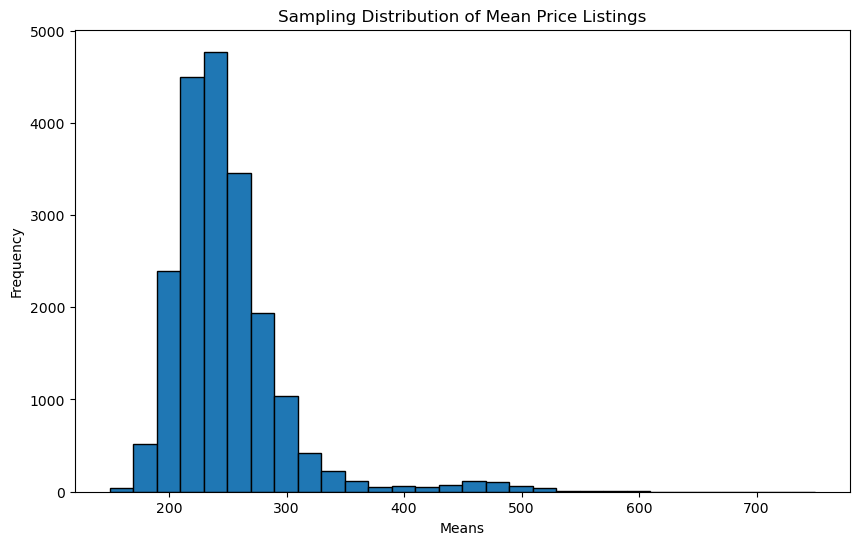

In [ ]:
# Plot the histogram of the sampling distribution

plt.figure(figsize=(10, 6))

plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')

 

# Add titles and labels

plt.title('Sampling Distribution of Mean Price Listings')

plt.xlabel('Means')

plt.ylabel('Frequency')

 

# Show the plot

plt.show()
 
# typically peaks around 250 > can check pop mean in this case; but not always

In [25]:
np.random.seed(1234)

one_sample = airbnb.sample(n = 40)

one_sample["price"].mean()

219.85

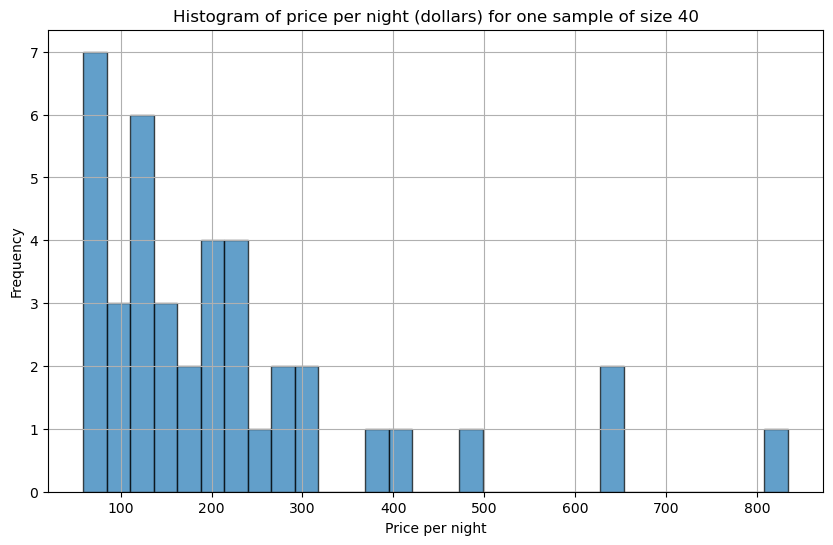

In [26]:
# plotting the price per night from the sample:

# Histogram of price per night (dollars) for one sample of size 40.

plt.figure(figsize=(10, 6))

plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

 

# Add titles and labels

plt.title('Histogram of price per night (dollars) for one sample of size 40')

plt.xlabel('Price per night')

plt.ylabel('Frequency')

 

# Show the plot

plt.grid(True)

plt.show()

In [27]:
boot1 = one_sample.sample(frac = 1, replace = True)

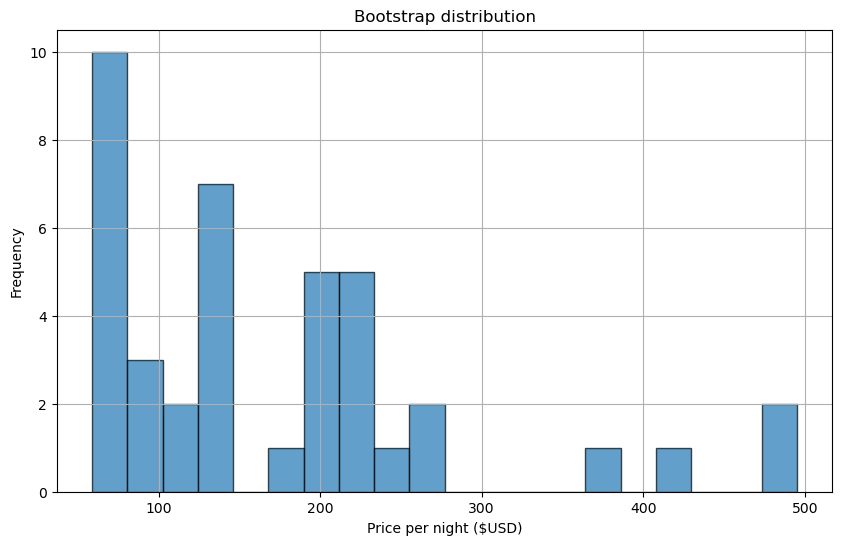

In [ ]:
# visualizing it; similar to the previous graph, but not quite the same

# Plot the histogram of the bootstrap distribution

plt.figure(figsize=(10, 6))

plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

 

# Add titles and labels

plt.title('Bootstrap distribution')

plt.xlabel('Price per night ($USD)')

plt.ylabel('Frequency')

 

# Show the plot

plt.grid(True)

plt.show()

In [30]:
# bootstrap mea

boot1['price'].mean()

175.425

In [ ]:
bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace = True)
    sample = sample.assign(replicate = i)
    # appending to the DF
    # will have 20K DFs
    bootstrap_samples.append(sample)
# 20K samples of 40 each
boot2000 = pd.concat(bootstrap_samples)

In [33]:
# Computing the mean by the replicate #

boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name= "mean_price")

boot_means

replicate  mean_price
0              0     208.250
1              1     205.800
2              2     183.925
3              3     211.600
4              4     239.475
...          ...         ...
19995      19995     176.725
19996      19996     217.450
19997      19997     204.600
19998      19998     216.900
19999      19999     198.375

[20000 rows x 2 columns]

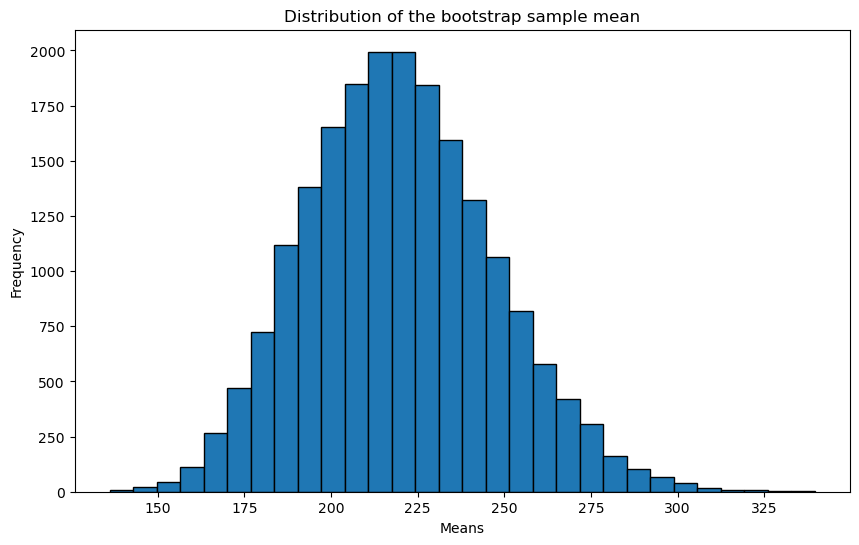

In [34]:
# Plot the histogram of the sampling distribution

plt.figure(figsize=(10, 6))

plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')

 

# Add titles and labels

plt.title('Distribution of the bootstrap sample mean')

plt.xlabel('Means')

plt.ylabel('Frequency')

 

# Show the plot

plt.show()

In [36]:
# calculate the 95% confidence interval

# need to sort; find the 2.5 and 97.5 quantile

ci_bounds = boot_means["mean_price"].quantile([0.025, 0.975])

ci_bounds

0.025    171.248750
0.975    276.300625
Name: mean_price, dtype: float64

In [37]:
# have one sample to get a calc

# then do bootstraping to get a better range of calc and Confidence intervals

In [ ]:
#  No class tmr it is a work period!

# On Thurs its extra material thats optional

# Stat inference 2 

# https://github.com/UofT-DSI/LCR/tree/main/04_this_cohort



Should split the data then train it;
